In [1]:
!pip install -q kaggle

In [2]:
!mkdir -p ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle/

In [4]:
# download the dataset
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 95.2MB/s]


In [5]:
# unzip the dataset
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [62]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Data Exploration

In [9]:
# read the data and convert it into a dataframe
data = pd.read_csv('/content/train.csv', index_col='Id')

In [16]:
# print the shape of the data frame
print('data frame shape: ', data.shape)
print("the data frame contains %2d rows, and %d columns (attributes)" % (data.shape[0], data.shape[1]))

data frame shape:  (1460, 80)
the data frame contains 1460 rows, and 80 columns (attributes)


In [21]:
# print information about the data
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [22]:
# print the first 10 rows of the dataframe
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Cleaning

In [28]:
# print the types of the attributes
print(data.dtypes.to_string())

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [29]:
# for simplicity let's exclude the non numerical attributes
num_data = data.select_dtypes(exclude=['object'])

In [30]:
# check that now we do not have any non numerical attributes
print(num_data.dtypes.to_string())

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64


In [31]:
# check for Nan values
# print the columns with NaN values
cols_with_nans = num_data.isnull().sum()
print("number of NaN values for the training data frame :")
print(cols_with_nans[cols_with_nans>0])

number of NaN values for the training data frame :
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [32]:
# since all the attributes are numerical, we will replace all the Nan values with the mean of the attribute
# replace the NaN values with the mean
clean_data = num_data.fillna(num_data.mean())

In [33]:
# let's check that we do  not have any NaN values
# print the columns with NaN values
cols_with_nans = clean_data.isnull().sum()
print("number of NaN values for the training data frame :")
print(cols_with_nans[cols_with_nans>0])

number of NaN values for the training data frame :
Series([], dtype: int64)


In [34]:
# finally, let's check the shape of the cleaned data
print('the shape of the data: ', clean_data.shape)
print('the data frame contains %d rows, and %d columns (attributes)' % (clean_data.shape[0], clean_data.shape[1]))

the shape of the data:  (1460, 37)
the data frame contains 1460 rows, and 37 columns (attributes)


# Exploratory Data Analysis

In [41]:
def plot_reg(x_var, y_var, DataFrame):
    # draw regplot
    sns.regplot(x = x_var,
                y = y_var,
                data = DataFrame)

    # show the plot
    plt.show()

In [40]:
# extract the names of the attributes
att_names = clean_data.columns.tolist()
print(att_names)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


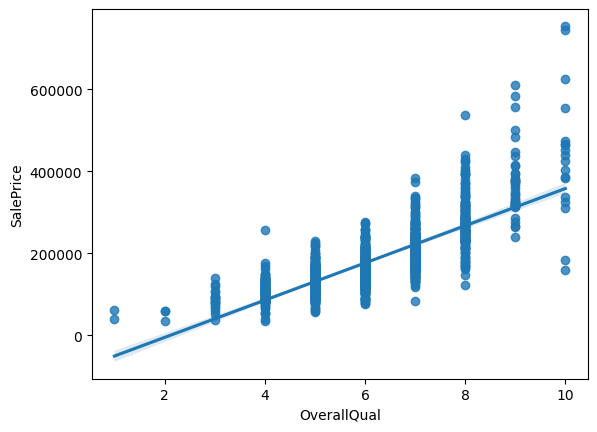

In [50]:
# plot the relation between OverallQual and SalePrice
plot_reg('OverallQual', 'SalePrice', clean_data)

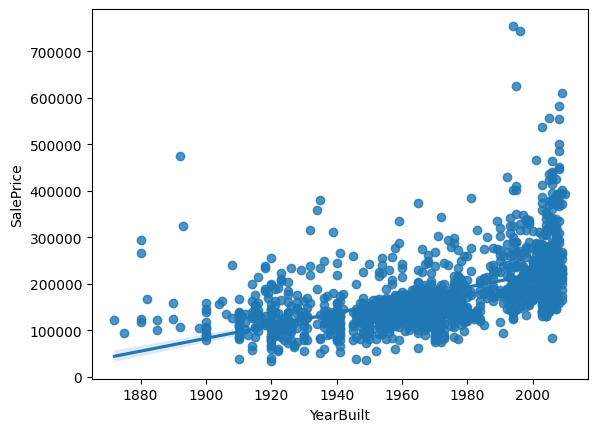

In [52]:
# plot the relation between YearBuilt and SalePrice
plot_reg('YearBuilt', 'SalePrice', clean_data)

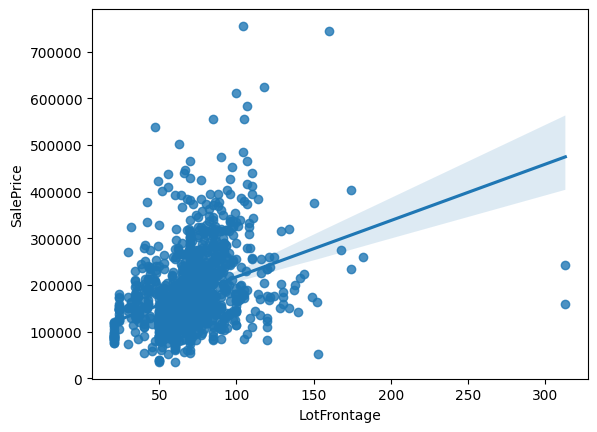

In [59]:
# plot the relation between LotFrontage and SalePrice
plot_reg('LotFrontage', 'SalePrice', clean_data)

# Data Splitting

In [60]:
# extract the features from the data frame
columns = clean_data.columns
features_names = columns[columns != 'SalePrice']
features = clean_data[features_names]
target = clean_data['SalePrice']

In [61]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Data Preprocessing

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [63]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test  = scaler.transform(X_test)

# Linear Regression Model

In [64]:
# create a linear regression model
lr_model = LinearRegression()

In [65]:
# fit the model
lr_model.fit(rescaledX_train, Y_train)

LinearRegression()

In [66]:
# get the prediction of the trained model
lr_predictions = lr_model.predict(rescaledX_test)

# Scores and Results

In [68]:
# evaluate the regression results
LinearRegression_SCR  = lr_model.score(rescaledX_test, Y_test)
LinearRegression_MAE  = mean_absolute_error(Y_test, lr_predictions)
LinearRegression_MSE  = mean_squared_error(Y_test, lr_predictions)
LinearRegression_RMSE = np.sqrt(mean_squared_error(Y_test, lr_predictions))
LinearRegression_R2   = r2_score(Y_test, lr_predictions)

In [88]:
# convert the scores into a dataframe and print it
Report = pd.DataFrame({'Metric': ['Score', 'MAE', 'MSE', 'RMSE','R^2'],
        'Value': [LinearRegression_SCR, LinearRegression_MAE, LinearRegression_MSE,
                  LinearRegression_RMSE, LinearRegression_R2]})
Report

,Metric,Value
0,Score,8.232090e-01
1,MAE,2.297695e+04
2,MSE,1.356045e+09
3,RMSE,3.682451e+04
4,R^2,8.232090e-01


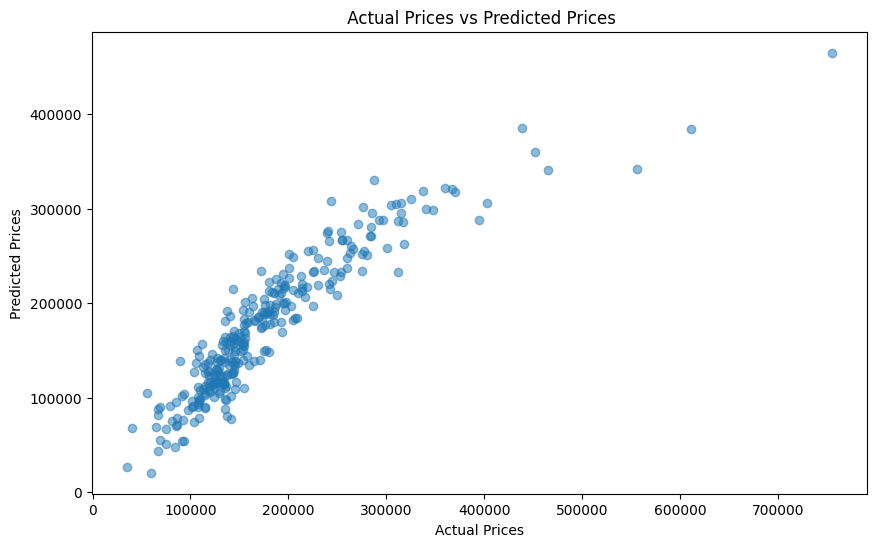

In [89]:
# plot Actual Prices vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, lr_predictions, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f" Actual Prices vs Predicted Prices")
plt.show()